<a href="https://colab.research.google.com/github/andlcoelho/miniprojetos/blob/main/Desafio_aula2_Univali_SeriesTemporais_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DESAFIO UNIVALI - AULA 2 SERIES TEMPORAIS**

O uso de dados sequenciais para a criação de modelos matemáticos é de vital importância para o entendimento da dinâmica de diversos problemas encontrados diariamente, como o aquecimento global. O aquecimento global é o processo de aumento da temperatura média dos oceanos e da atmosfera da Terra causado por uma série de atividades humanas, principalmente pelo uso de combustíveis fósseis e desmatamento para expansão da produção agrícola. Este é um problema que vem sendo observado ao longo dos anos, de modo a apresentar grandes conjuntos de dados sequenciais.

**Com essas informações, você deve decompor a série em suas componentes de tendência e sazonalidade. Além disso, utilize o método de suavização exponencial sazonal de Holt-Winters e mais um método de sua escolha para a previsão do valor de temperatura para o próximo ano. Compare os resultados obtidos.**

IMPORTAÇÃO E ANÁLISE DO DATAFRAME

In [37]:
# importação das bibliotecas para análise dos dados
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
# carrega o dataframe na variável df
df = pd.read_excel('/content/drive/MyDrive/Estudos/Univali - Tecnologo em Ciência de Dados/Conteúdo das Aulas/Series temporais/Desafio - Series Temporais.xlsx',
                   index_col = 0) # converti a primeira coluna do dataframe em índice da tabela

In [14]:
# checa informações sobre os tipos de dadso no dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 1880 to 2019
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Observações  140 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [12]:
# exibe as 5 primeiras linhas do Dataframe
df.head()

,Observações
Ano,
1880,-0.16
1881,-0.07
1882,-0.10
1883,-0.16
1884,-0.27


In [19]:
df.tail()

,Observações
Ano,
2015,0.90
2016,1.02
2017,0.93
2018,0.85
2019,0.98


<Axes: xlabel='Ano'>

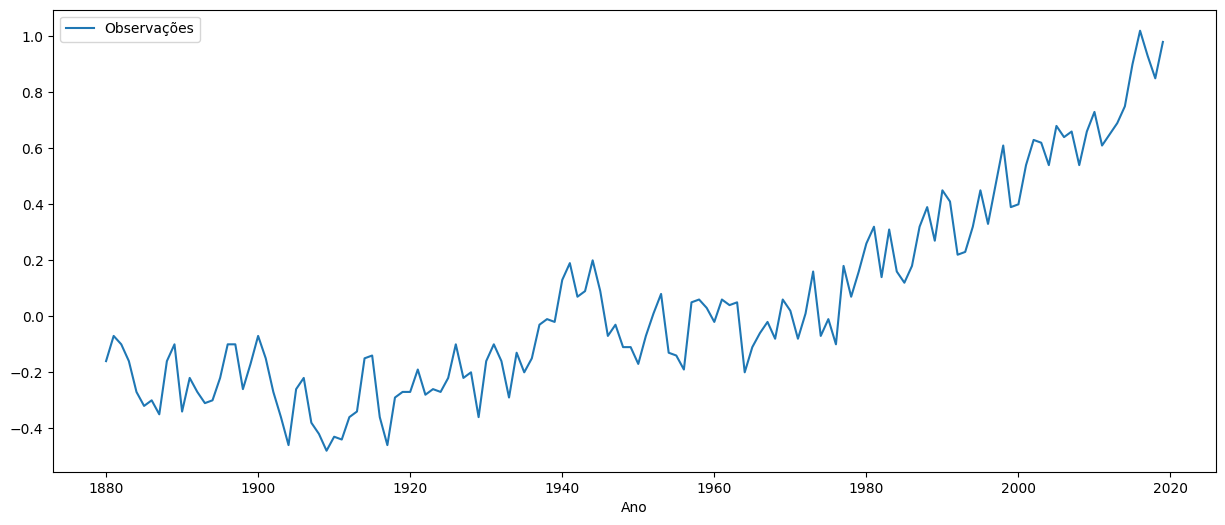

In [13]:
# plotagem dos dados do dataframe
df.plot(figsize=(15,6))

<Axes: xlabel='Ano'>

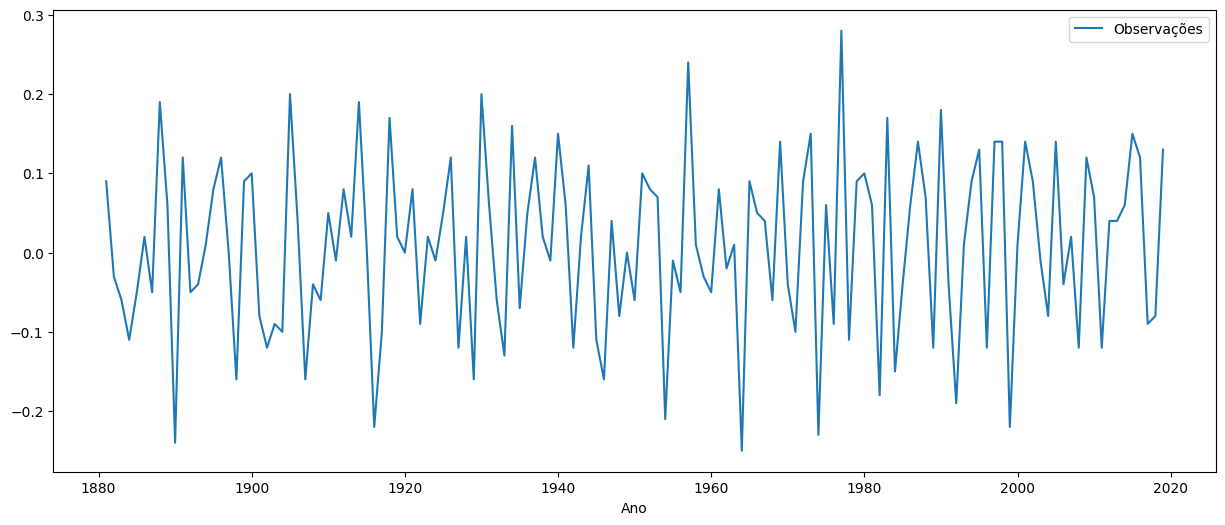

In [15]:
# analise da sazonalidade do dataframe
df.diff().plot(figsize=(15,6))

In [17]:
# devido ao tamonho das informações não permitirem uma análise mais precisa, é interessante criar uns filtros
# no período analisado, assim, fica mais fácil a compreensão de quando ocorrem os picos nas observações.

In [22]:
# filtrando os anos iniciais (1880 a 1900)
filtro1 = (df.index >= 1880) & (df.index <= 1900)
filtro2 = (df.index >= 1901) & (df.index <= 1950)
filtro3 = (df.index >= 1951) & (df.index <= 2000)
filtro4 = (df.index >= 2001) & (df.index <= 2019)

<Axes: xlabel='Ano'>

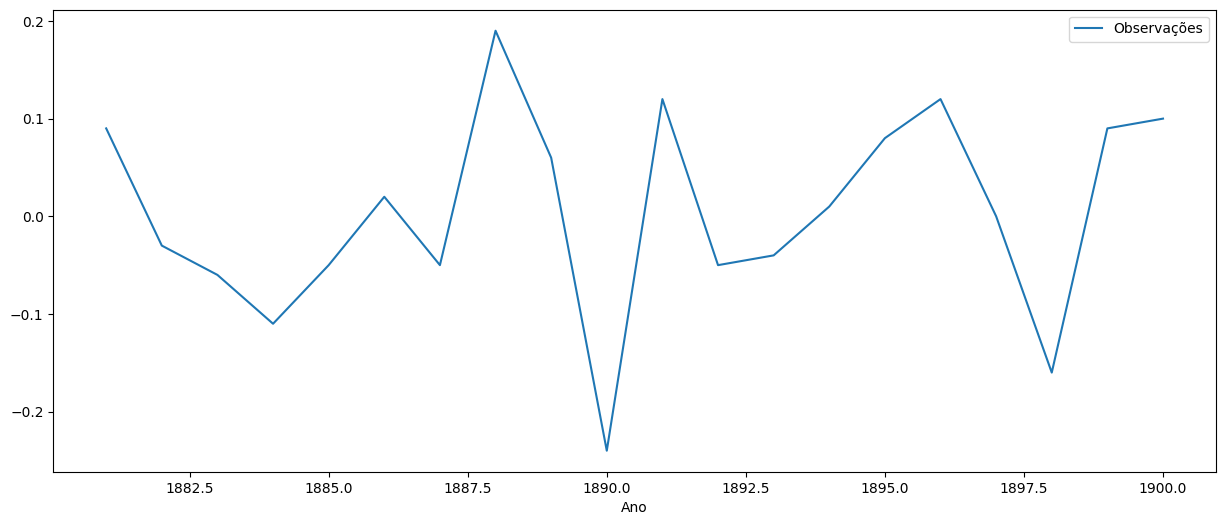

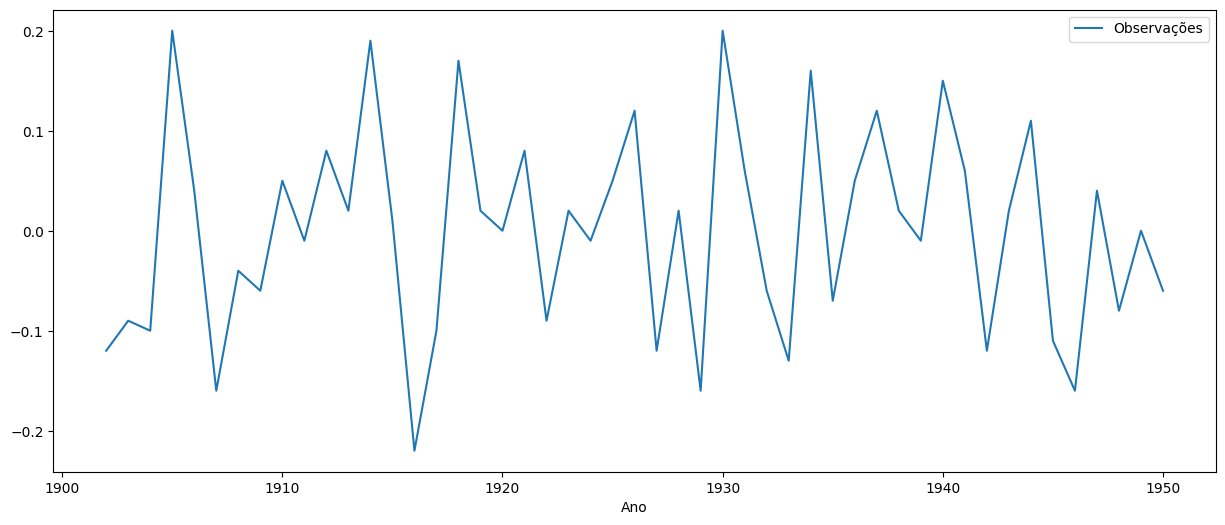

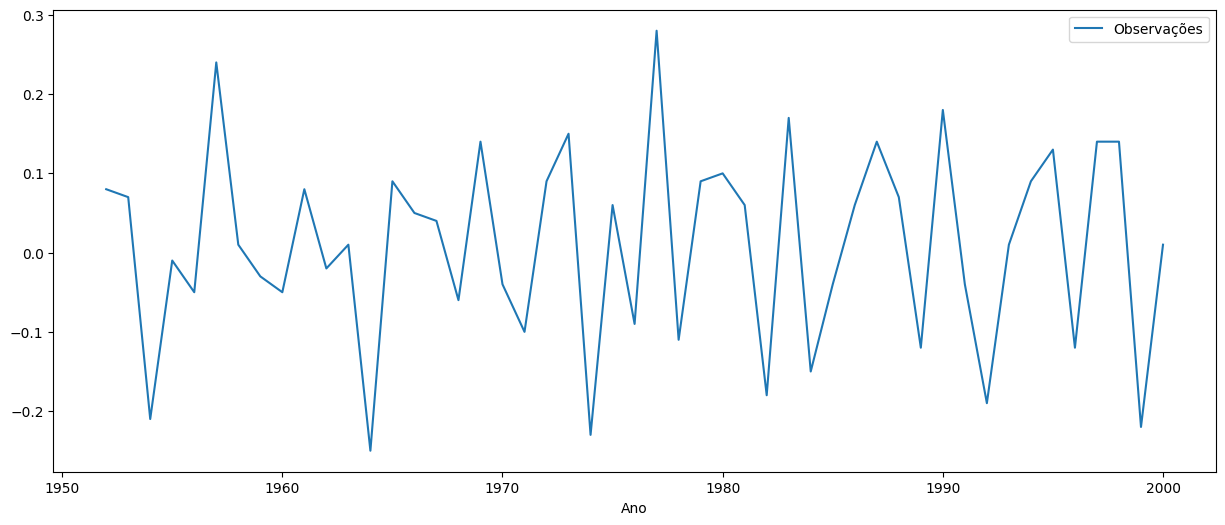

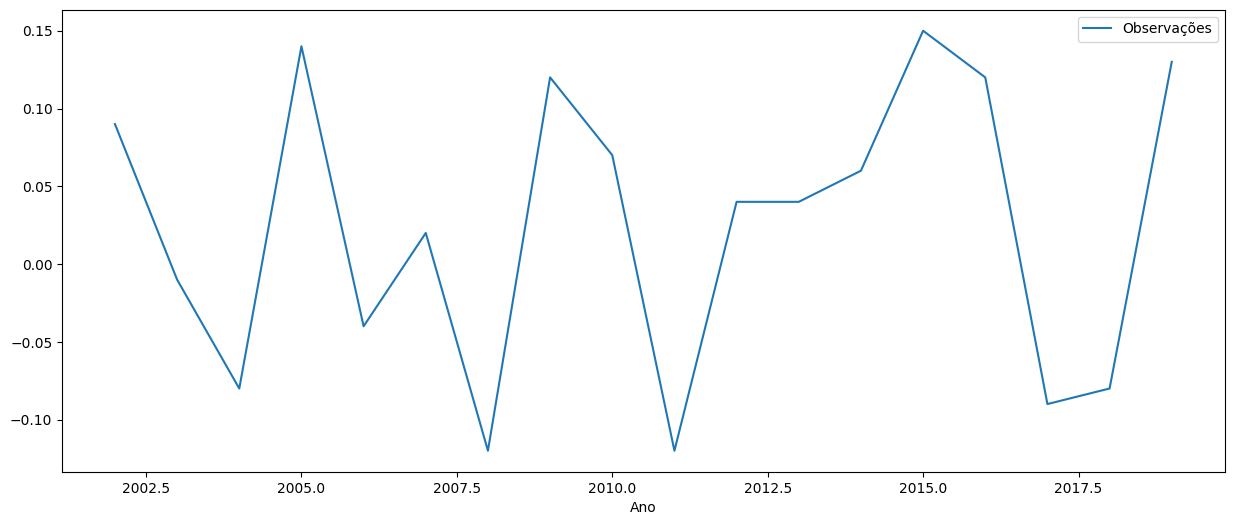

In [24]:
# plotando o gráfico do primeiro filtro
df[filtro1].diff().plot(figsize = (15, 6))
df[filtro2].diff().plot(figsize = (15, 6))
df[filtro3].diff().plot(figsize = (15, 6))
df[filtro4].diff().plot(figsize = (15, 6))

In [29]:
# Para analisar a tendencia dos dados vou utilizar uma função que vai plotar os dados analisados e sua média móvel

def plot_media_movel(timeseries):
  rolmean = timeseries.rolling(20).mean()

  plt.figure(figsize = (15,6))
  original = plt.plot(timeseries, color = 'blue', label = 'Original')
  media_movel = plt.plot(rolmean, color = 'red', label = 'Media móvel a cada 20 anos')
  plt.legend(loc = 'best')
  plt.title('Observações Originais e média movel a cada 20 anos')
  plt.show(block=False)

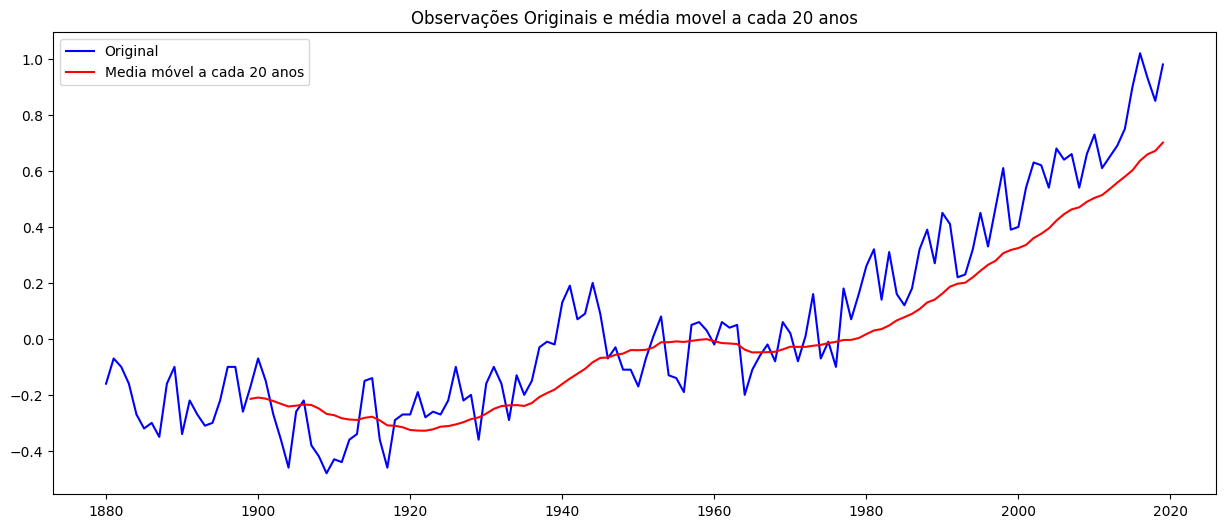

In [30]:
plot_media_movel(df)

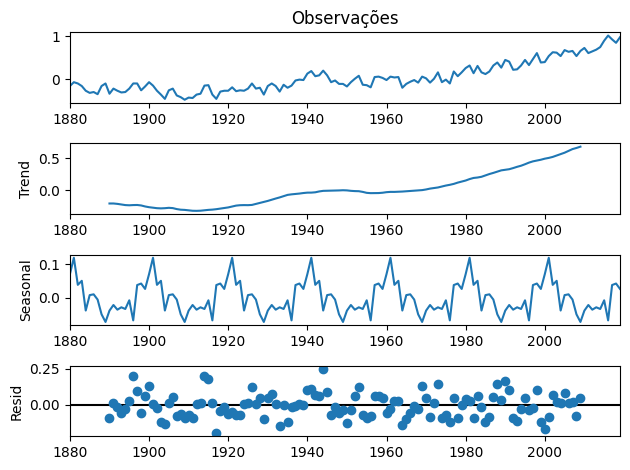

In [44]:
decompose_result = seasonal_decompose(df['Observações'], model = 'aditive', period = 20)
decompose_result.plot();